In [1]:
#importing libraries
import numpy as np
import pandas as pd
#keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras import regularizers
from keras.layers import Dropout
from keras.utils import to_categorical

# for combining all the hyper-parameters
import itertools 
from time import time
from sklearn.pipeline import Pipeline
from keras import initializers
from sklearn.model_selection import StratifiedKFold

In [47]:
#Extracting the training and test sets
train_df = pd.read_csv('../data/monks-1-train.csv').to_numpy()
test_df = pd.read_csv('../data/monks-1-test.csv').to_numpy()

In [3]:
#Preparing train_df for training
train_set = train_df[:, 1:7]
train_label = train_df[:, 0]

In [4]:
#Preparing test_df for testing
test_set = test_df[:, 1:7]
test_label = test_df[:, 0]

In [9]:
# test_set.shape ,test_label.shape , train_set.shape , train_label.shape

((431, 6), (431,), (123, 6), (123,))

In [5]:
# one hot encoding 
from keras.utils import to_categorical

def fix_zero(dataset):
  return dataset - 1

def to_one_hot_encoding(dataset):
    fixed_dataset = fix_zero(dataset)
    one_hot_dataset = []
    for column in fixed_dataset.T:
        one_hot_column = to_categorical(column)
        for column_index in range(one_hot_column.shape[1]):
            one_hot_dataset.append(one_hot_column[:,column_index])
    return np.asarray(one_hot_dataset).T

In [10]:
one_hot_train = to_one_hot_encoding(train_set)
one_hot_test  = to_one_hot_encoding(test_set)
# one_hot_train.shape , train_label.shape
# one_hot_test.shape , test_label.shape

In [6]:
def create_model(
                    lr=0.7, 
                    num_hidden_units_1=10,
                    num_hidden_units_2=1, 
                    activation_hidden_1="relu", 
                    activation_hidden_2="relu", 
                    activation_out="softmax", 
                    init_mode=initializers.RandomNormal(mean=0., stddev=1.), 
                    momentum=0.7, 
                    decay=0.01
                ):
    # create model
    model = Sequential()
    initializer = initializers.GlorotNormal(seed=42) # has the parameter of seed to produce the same random sample.
    model.add(Dense(units=num_hidden_units_1, kernel_initializer=initializer, input_dim=17, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #optimizer
    sgd = SGD(lr=lr, momentum=momentum, nesterov=False)  # We can add decay to hyper parameter list to get optimum value. 

    # Compile model
    model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
    return model

In [7]:
# screening 
def plot_accuracy_two_params(history, par_a, value_a, par_b, value_b, axs):
    plt.subplot(axs)
    plt.plot(history.history['accuracy'], label='TR_set')
    plt.plot(history.history['val_accuracy'], label='VL_set')
    axs.set_title('Model Accuracy [' + par_a + ' = ' + str(value_a) + '] [' + par_b + ' = ' + str(value_b) + ']' )
    axs.set_ylabel('Accuracy')
    axs.set_xlabel('Epoch')
    axs.legend(loc='best')

def plot_loss_two_params(history, par_a, value_a, par_b, value_b, axs):
    plt.subplot(axs)
    plt.plot(history.history['loss'], label='TR_set')
    plt.plot(history.history['val_loss'], label='VL_set')
    axs.set_title('Model Loss (MSE) [' + par_a + ' = ' + str(value_a) + '] [' + par_b + ' = ' + str(value_b) + ']' )
    axs.set_ylabel('MSE')
    axs.set_xlabel('Epoch')
    axs.legend(loc='best')

def screening_phase(par_a, values_a, par_b, values_b, plot_function=plot_loss_two_params):
    num_values_a = len(values_a)
    num_values_b = len(values_b)
    f, axs = plt.subplots(nrows= num_values_a, ncols=num_values_b, figsize=(8*num_values_b, 5*num_values_a))
    for i in range(num_values_a):
        for j in range(num_values_b):
            params = {par_a : values_a[i], par_b : values_b[j]}
            model = KerasClassifier(build_fn=create_model, **params)
            history = model.fit(one_hot_train, train_label, validation_data=(one_hot_test, test_label), epochs=90, batch_size=10, verbose=0)
            plot_function(history, par_a, values_a[i], par_b, values_b[j], axs[i][j])
    plt.suptitle('Screening phase on ' + par_a + ' and ' + par_b)
    plt.show()



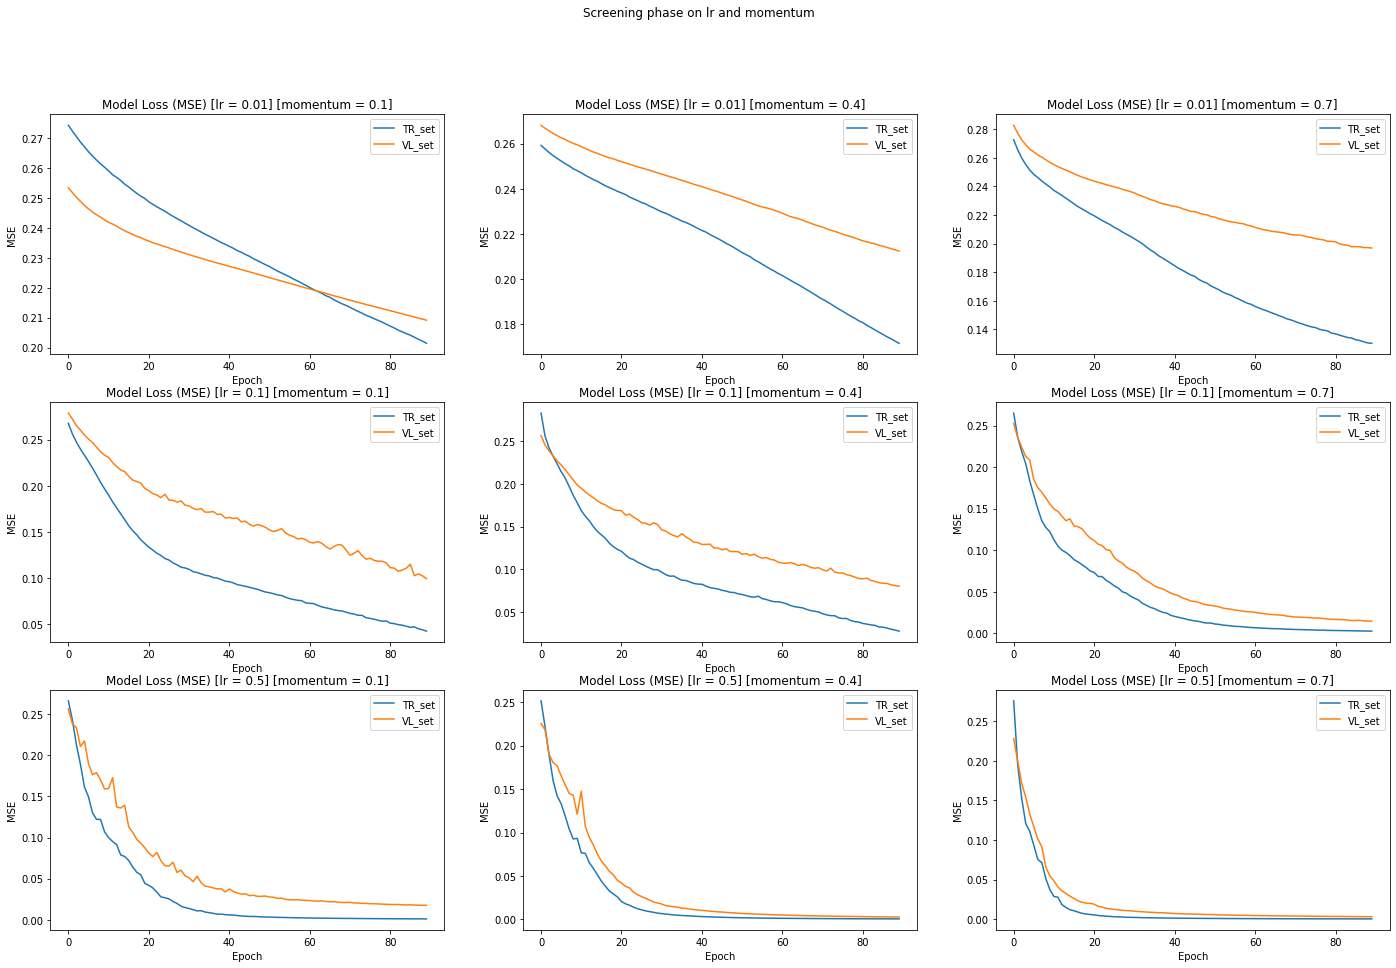

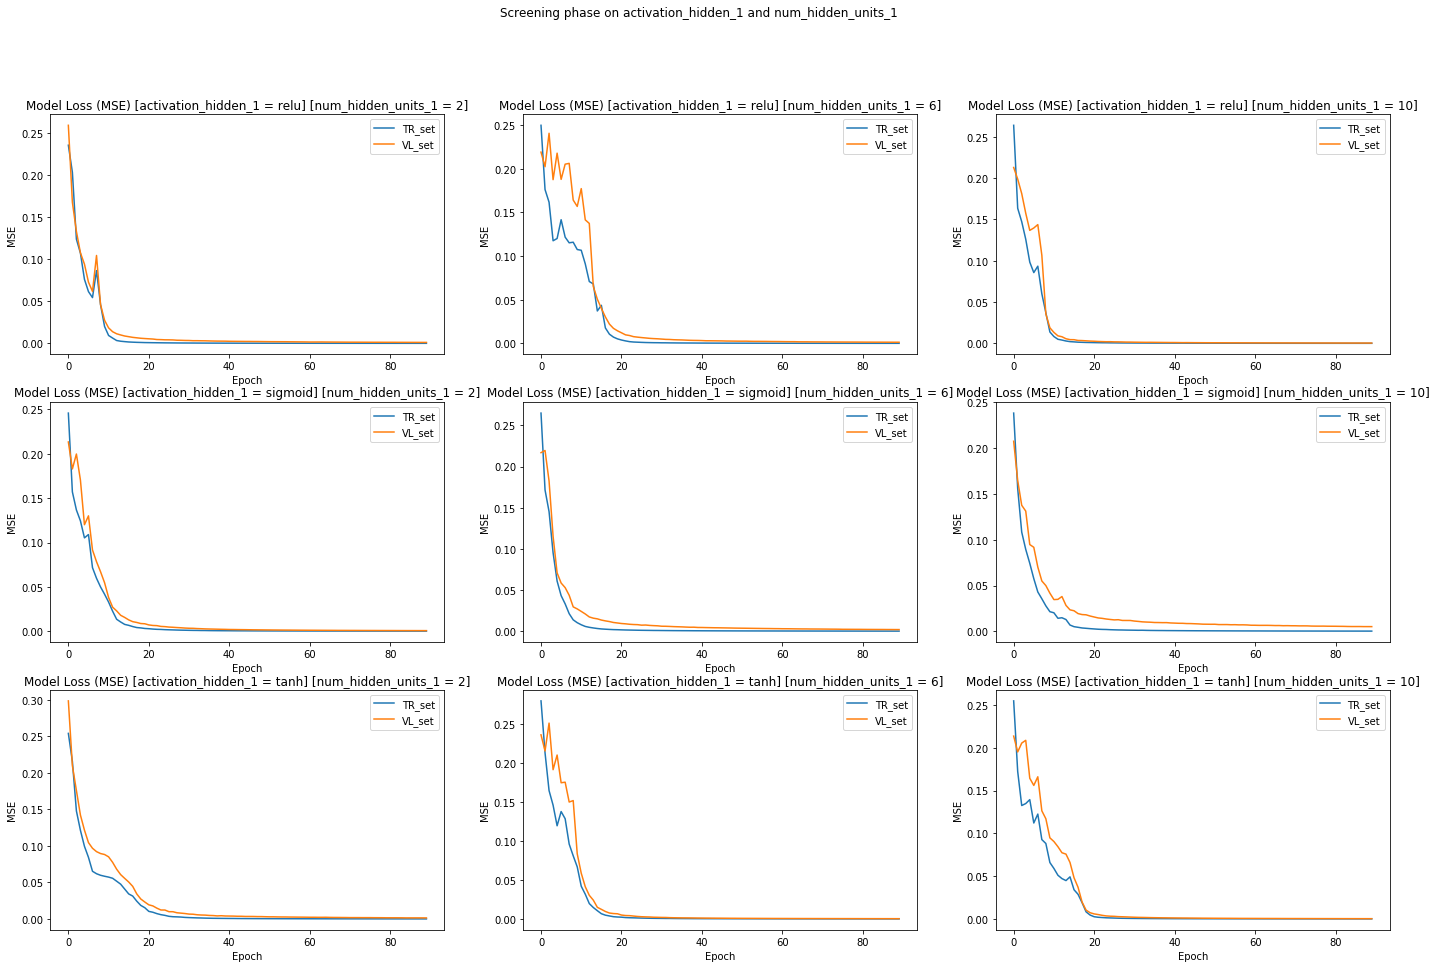

In [92]:
screening_phase('lr', [0.01, 0.1, 0.5], 'momentum', [0.1, 0.4, 0.7])
screening_phase('activation_hidden_1', ['relu', 'sigmoid', 'tanh'], 'num_hidden_units_1', [2, 6, 10]) 

In [43]:
model = Sequential()
initializer = initializers.GlorotNormal(seed=52) # has the parameter of seed to produce the same random sample.
model.add(Dense(units=6, kernel_initializer=initializer, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr= 0.5, momentum=0.7, nesterov=True)
model.compile(optimizer=sgd, loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(one_hot_train, train_label,validation_data=(one_hot_test, test_label), epochs=90, batch_size=10, verbose=1)

Epoch 1/90
13/13 [==============================] - 0s 10ms/step - loss: 0.2496 - accuracy: 0.6098 - val_loss: 0.2202 - val_accuracy: 0.6497
Epoch 2/90
13/13 [==============================] - 0s 5ms/step - loss: 0.1996 - accuracy: 0.7317 - val_loss: 0.1963 - val_accuracy: 0.7680
Epoch 3/90
13/13 [==============================] - 0s 5ms/step - loss: 0.1608 - accuracy: 0.7642 - val_loss: 0.1677 - val_accuracy: 0.7680
Epoch 4/90
13/13 [==============================] - 0s 6ms/step - loss: 0.1454 - accuracy: 0.7805 - val_loss: 0.1645 - val_accuracy: 0.7587
Epoch 5/90
13/13 [==============================] - 0s 7ms/step - loss: 0.1295 - accuracy: 0.8130 - val_loss: 0.1370 - val_accuracy: 0.7981
Epoch 6/90
13/13 [==============================] - 0s 6ms/step - loss: 0.1073 - accuracy: 0.8699 - val_loss: 0.1705 - val_accuracy: 0.7007
Epoch 7/90
13/13 [==============================] - 0s 6ms/step - loss: 0.0923 - accuracy: 0.8780 - val_loss: 0.1006 - val_accuracy: 0.8724
Epoch 8/90
13/13 [=

13/13 [==============================] - 0s 6ms/step - loss: 5.9164e-04 - accuracy: 1.0000 - val_loss: 6.1678e-04 - val_accuracy: 1.0000
Epoch 59/90
13/13 [==============================] - 0s 7ms/step - loss: 5.7899e-04 - accuracy: 1.0000 - val_loss: 6.0405e-04 - val_accuracy: 1.0000
Epoch 60/90
13/13 [==============================] - 0s 5ms/step - loss: 5.6809e-04 - accuracy: 1.0000 - val_loss: 5.9401e-04 - val_accuracy: 1.0000
Epoch 61/90
13/13 [==============================] - 0s 5ms/step - loss: 5.5462e-04 - accuracy: 1.0000 - val_loss: 5.7955e-04 - val_accuracy: 1.0000
Epoch 62/90
13/13 [==============================] - 0s 5ms/step - loss: 5.4154e-04 - accuracy: 1.0000 - val_loss: 5.6383e-04 - val_accuracy: 1.0000
Epoch 63/90
13/13 [==============================] - 0s 5ms/step - loss: 5.3249e-04 - accuracy: 1.0000 - val_loss: 5.5461e-04 - val_accuracy: 1.0000
Epoch 64/90
13/13 [==============================] - 0s 5ms/step - loss: 5.2016e-04 - accuracy: 1.0000 - val_loss: 5.4

In [64]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


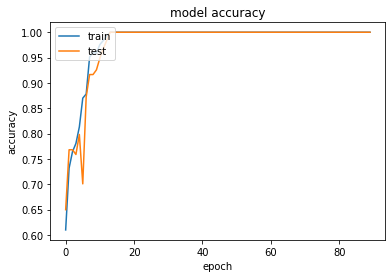

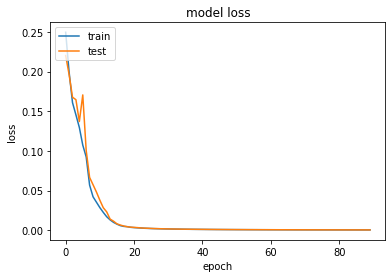

In [44]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [11]:
start=time()
model = KerasClassifier(build_fn=create_model) 

# define the grid search parameters
space = {}
space['lr'] = [0.5,0.45,0.55]
space['momentum'] = [0.6,0.7,0.8]
space['num_hidden_units_1'] = [5,6,7]
space['activation_hidden_1'] = ['relu','softmax','tanh','sigmoid']
space['epochs'] = [50 ,90,100,150] 

grid = GridSearchCV(estimator=model, param_grid=space,n_jobs=-1,cv=cv,verbose=2)
# grid = RandomizedSearchCV(model, param_grid,cv=3,verbose=2,return_train_score=False,n_iter=3)
grid_result = grid.fit(one_hot_train, train_label)
end=time()

print("Total Running Time: %f",end-start)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Mean\tSTD\tParams")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# pd.DataFrame(grid.cv_results_) 

Fitting 30 folds for each of 432 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 37.6min
/home/anelay/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory 

Epoch 1/90
4/4 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.5203
Epoch 2/90
4/4 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.6748
Epoch 3/90
4/4 [==============================] - 0s 1ms/step - loss: 0.1936 - accuracy: 0.7317
Epoch 4/90
4/4 [==============================] - 0s 1ms/step - loss: 0.1741 - accuracy: 0.7967
Epoch 5/90
4/4 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.8130
Epoch 6/90
4/4 [==============================] - 0s 1ms/step - loss: 0.1451 - accuracy: 0.8780
Epoch 7/90
4/4 [==============================] - 0s 1ms/step - loss: 0.1323 - accuracy: 0.8780
Epoch 8/90
4/4 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.8780
Epoch 9/90
4/4 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.8780
Epoch 10/90
4/4 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.8699
Epoch 11/90
4/4 [======================

4/4 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 86/90
4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 87/90
4/4 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 88/90
4/4 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 89/90
4/4 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 90/90
4/4 [==============================] - 0s 2ms/step - loss: 9.8607e-04 - accuracy: 1.0000
Total Running Time: %f 5438.507166862488
Best: 1.000000 using {'activation_hidden_1': 'softmax', 'epochs': 90, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 6}
Mean	STD	Params
0.958761 (0.066939) with: {'activation_hidden_1': 'relu', 'epochs': 50, 'lr': 0.5, 'momentum': 0.6, 'num_hidden_units_1': 5}
0.967308 (0.054728) with: {'activation_hidden_1': 'relu', 'epochs': 50, 'lr': 0.5, 'momentum': 0.6, 'num_hidden_units_1':

0.994444 (0.029918) with: {'activation_hidden_1': 'softmax', 'epochs': 150, 'lr': 0.5, 'momentum': 0.6, 'num_hidden_units_1': 7}
0.983547 (0.039331) with: {'activation_hidden_1': 'softmax', 'epochs': 150, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 5}
1.000000 (0.000000) with: {'activation_hidden_1': 'softmax', 'epochs': 150, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 6}
0.988889 (0.041574) with: {'activation_hidden_1': 'softmax', 'epochs': 150, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 7}
0.978419 (0.051027) with: {'activation_hidden_1': 'softmax', 'epochs': 150, 'lr': 0.5, 'momentum': 0.8, 'num_hidden_units_1': 5}
0.988889 (0.035573) with: {'activation_hidden_1': 'softmax', 'epochs': 150, 'lr': 0.5, 'momentum': 0.8, 'num_hidden_units_1': 6}
0.980983 (0.046002) with: {'activation_hidden_1': 'softmax', 'epochs': 150, 'lr': 0.5, 'momentum': 0.8, 'num_hidden_units_1': 7}
0.950855 (0.081056) with: {'activation_hidden_1': 'softmax', 'epochs': 150, 'lr': 0.45, 'momentum

In [ ]:
Best: 1.000000 using {'activation_hidden_1': 'softmax', 'epochs': 90, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 6}